# ATMS Instrumentation Lab

#### Analysis of MOSDAC data for the Delhi region for the time period from 1st Jan 2015 to 1st Jan 2016. This is to the study the Seasonal variation of atmospheric variables and other important parameters over the Delhi region. 

Work done by Aditya Sengupta (Roll No. - 420AS2068)

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import requests

import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-pastel')
sns.set_theme(style="whitegrid")

from descartes import PolygonPatch
import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go

from windrose import WindroseAxes
from windrose import plot_windrose
import matplotlib.cm as cm

%matplotlib inline

In [10]:
data = pd.read_csv('DELHI_IMDE1662_01-01-2015_01-01-2016_Oct20_157810.csv', index_col=0)
data.head()

,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),DATE(GMT),TIME(IST),DATE(IST),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),SUN_SHINE(hh:mm),BATTERY_VOLTAGE(V)
@STATION_ID,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,0,01/01/2015,5:30,01/01/2015,24.4,0.5,330.9,939.7,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,1,01/01/2015,6:30,01/01/2015,24.7,0.3,312.8,939.8,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,2,01/01/2015,7:30,01/01/2015,24.4,0.2,350.9,940.3,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,3,01/01/2015,8:30,01/01/2015,25.0,0.7,334.8,941.1,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,4,01/01/2015,9:30,01/01/2015,26.3,0.7,333.8,942.8,0.0,0.0,0:0,9953.0


In [11]:
data.describe()

,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),BATTERY_VOLTAGE(V)
count,5.216000e+03,5216.00,0.0,5216.000000,5216.000000,5216.000000,5216.00000,5216.000000,5216.000000,5216.000000,5216.0
mean,2.861000e+01,77.27,NaN,11.234663,30.169574,1.153911,239.07036,935.578604,38.890146,0.833397,9953.0
std,7.106109e-15,0.00,NaN,7.052097,3.696948,0.928608,92.41433,6.075187,48.272084,4.386465,0.0
min,2.861000e+01,77.27,NaN,0.000000,21.600000,0.000000,0.00000,917.600000,0.000000,0.000000,9953.0
25%,2.861000e+01,77.27,NaN,5.000000,27.200000,0.500000,157.90000,930.400000,0.000000,0.000000,9953.0
50%,2.861000e+01,77.27,NaN,11.000000,30.400000,0.900000,275.20000,937.200000,0.000000,0.000000,9953.0
75%,2.861000e+01,77.27,NaN,17.000000,33.100000,1.600000,311.80000,940.300000,99.000000,0.000000,9953.0
max,2.861000e+01,77.27,NaN,23.000000,39.800000,6.500000,359.20000,948.200000,99.000000,73.000000,9953.0


In [12]:
# Units used -
# Altitude in meters
# Time and Date in GMT
# Time in IST
# AIR_TEMP in celcius
# Wind speadd in m/s
# Wind direction in degrees
# atmos pressure in hPa
# Rain fall in mm
# Humidity in %
# Sunshine in hh:mm
# battery voltage in V

old_names = list(data.columns)
new_names = ["latitude",
             "longitude",
             "altitude",
             "time_gmt",
             "date_gmt",
             "time_ist",
             "date_ist",
             "Tc",
             "wind_speed",
             "wind_dir",
             "atmo_press",
             "humidity",
             "rainfall",
             "sunshine",
             "battery_voltage"]

d1 = zip(old_names,new_names)
name_dict = dict(d1)

data.rename(columns = name_dict, inplace=True)
data.head()

,latitude,longitude,altitude,time_gmt,date_gmt,time_ist,date_ist,Tc,wind_speed,wind_dir,atmo_press,humidity,rainfall,sunshine,battery_voltage
@STATION_ID,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,0,01/01/2015,5:30,01/01/2015,24.4,0.5,330.9,939.7,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,1,01/01/2015,6:30,01/01/2015,24.7,0.3,312.8,939.8,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,2,01/01/2015,7:30,01/01/2015,24.4,0.2,350.9,940.3,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,3,01/01/2015,8:30,01/01/2015,25.0,0.7,334.8,941.1,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,4,01/01/2015,9:30,01/01/2015,26.3,0.7,333.8,942.8,0.0,0.0,0:0,9953.0


Text(0.5, 0, 'Air Temp (°C)')

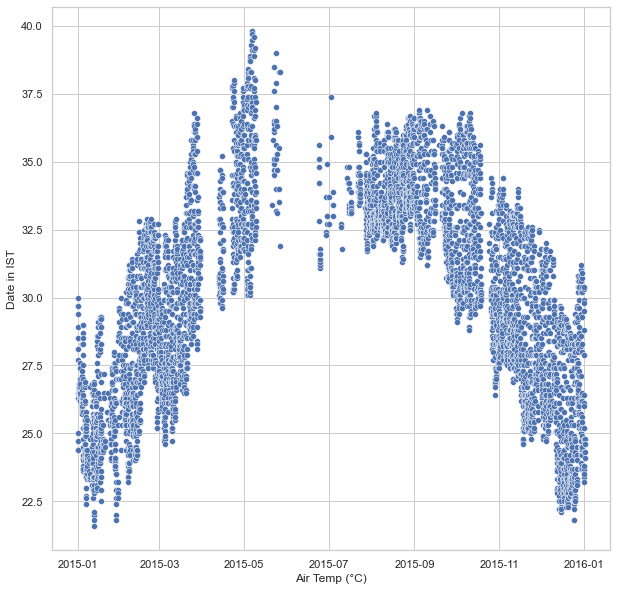

In [13]:
# Testing the validity of the data by plotting a time-series for raw data

data['date_ist'] = pd.to_datetime(data['date_ist'], errors='coerce')

plt.figure(figsize=(10,10))
sns.scatterplot(data = data, x='date_ist', y='Tc')
# plt.xticks(df_damage_count.index, rotation= 10)
plt.ylabel('Date in IST', fontsize=12)
plt.xlabel('Air Temp (°C)', fontsize=12)

In [14]:
# Obtain year, month and day as well as week columns from the data in IST

data['year'] = pd.DatetimeIndex(data['date_ist']).year 
data['month'] = pd.DatetimeIndex(data['date_ist']).month
data['day'] = pd.DatetimeIndex(data['date_ist']).day

# Now let's make weeks - 

# 1st method
#weekly_data = data.groupby("@STATION_ID").resample('W-Wed', label='right', closed = 'right', on='date_ist').mean().reset_index().sort_values(by='date_ist')
#weekly_data.head()

# 2nd method

data['date_ist'] = pd.to_datetime(data['date_ist'])
data['Week_Number'] = data['date_ist'].dt.week
#weekly_Tc = pd.DataFrame()
#weekly_Tc['Tc'] = data.Tc.resample('W').mean().reset_index().sort_values(by='date_ist')
#weekly_Tc['error'] = data.Tc.resample('W').std().reset_index().sort_values(by='date_ist')

#weekly_Tc.head()
data.head()

data.head()

<ipython-input-14-8ebec5d3e40c>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week_Number'] = data['date_ist'].dt.week


,latitude,longitude,altitude,time_gmt,date_gmt,time_ist,date_ist,Tc,wind_speed,wind_dir,atmo_press,humidity,rainfall,sunshine,battery_voltage,year,month,day,Week_Number
@STATION_ID,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,0,01/01/2015,5:30,2015-01-01,24.4,0.5,330.9,939.7,0.0,0.0,0:0,9953.0,2015,1,1,1
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,1,01/01/2015,6:30,2015-01-01,24.7,0.3,312.8,939.8,0.0,0.0,0:0,9953.0,2015,1,1,1
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,2,01/01/2015,7:30,2015-01-01,24.4,0.2,350.9,940.3,0.0,0.0,0:0,9953.0,2015,1,1,1
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,3,01/01/2015,8:30,2015-01-01,25.0,0.7,334.8,941.1,0.0,0.0,0:0,9953.0,2015,1,1,1
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,4,01/01/2015,9:30,2015-01-01,26.3,0.7,333.8,942.8,0.0,0.0,0:0,9953.0,2015,1,1,1


In [16]:
# Changing the order of columns for simplicity using lists
# Only run when the table changes accidentally to normal as before. Uncomment the first 3 lines and then run.

#cols = list(data.columns) 
#cols = cols[:7]+cols[-4:]+cols[7:15]
#data = data[cols]
data.head()

,latitude,longitude,altitude,time_gmt,date_gmt,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,wind_dir,atmo_press,humidity,rainfall,sunshine,battery_voltage
@STATION_ID,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,0,01/01/2015,5:30,2015-01-01,2015,1,1,1,24.4,0.5,330.9,939.7,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,1,01/01/2015,6:30,2015-01-01,2015,1,1,1,24.7,0.3,312.8,939.8,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,2,01/01/2015,7:30,2015-01-01,2015,1,1,1,24.4,0.2,350.9,940.3,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,3,01/01/2015,8:30,2015-01-01,2015,1,1,1,25.0,0.7,334.8,941.1,0.0,0.0,0:0,9953.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,NaN,4,01/01/2015,9:30,2015-01-01,2015,1,1,1,26.3,0.7,333.8,942.8,0.0,0.0,0:0,9953.0


In [17]:
# Let's define some important values that we might want to analyse as a time-series

drop_list = ["altitude","sunshine", "battery_voltage","time_gmt","date_gmt"]
data = data.drop(drop_list, axis = 1)
data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,wind_dir,atmo_press,humidity,rainfall
@STATION_ID,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,330.9,939.7,0.0,0.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,312.8,939.8,0.0,0.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,350.9,940.3,0.0,0.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,334.8,941.1,0.0,0.0
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,333.8,942.8,0.0,0.0


In [18]:
# Let us ccalculate some important paramenters and add in the dataframe

# temp in Farh and Kel
data['Tf'] = 1.8 * data['Tc'] + 32
data['Tk'] = data['Tc'] + 273.15

# Dew Point temp (Tdf)in F
data['X'] = 1 - (0.01 * data['humidity'])
data['Tdc'] = data['Tc'] - (14.55 + 0.114 * data['Tc'])* data['X'] - ((2.5 + 0.007 * data['Tc'])* data['X'])**3 - (15.9 + 0.117 * data['Tc']) * data['X']**14
data['Tdf'] = (data['Tdc'] * 1.8) + 32

# saturation vapour pressure (Es) and vapour pressure (E)
data['Es'] = (6.11 * 10**(7.5 * data['Tc'] / (237.7 + data['Tc'])))
data['E'] = (6.11 * 10**(7.5 * data['Tdc'] / (237.7 + data['Tdc'])))
data['RH'] = (data['E']/data['Es']) * 100

# calculate virtual and dry potential temperature (theta) and saturated potential temperature
data['Tv'] = (data['Tk'] / (1 - 0.378 * (data['E']/data['atmo_press']))) - 273.15
data['theta'] = data['Tc'] * ((1000/data['atmo_press'])**0.2854)
data['M'] = (3 * (data['RH']*(3.884266 * 10 ** (( 7.5 * data['Tc'] ) / (237.7 + data['Tc'])) ) /100 ))
data['thetaE'] = data['Tc'] * (1000**0.286) + (3*data['M'])
                       
data = data.drop(['Tf','Tk','X','Tdf','M'], axis=1)
data.head()                        

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,atmo_press,humidity,rainfall,Tdc,Es,E,RH,Tv,theta,thetaE
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,939.7,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456273,24.836975,178.639683
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,939.8,0.0,0.0,-30.551952,31.047343,0.478495,1.541179,24.757334,25.141584,180.851260
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,940.3,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456237,24.832451,178.639683
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,941.1,0.0,0.0,-30.366297,31.606989,0.487062,1.540993,25.058339,25.436910,183.063595
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,942.8,0.0,0.0,-29.562611,34.135031,0.525757,1.540228,26.363135,26.745850,192.659390


In [19]:
# Let us define the seasons now - 
#array for storing the size_class

season = []

for month in data.month:
    if month in [1,2,12]:
        season.append("Winter")
    elif month in [3,4,5]:
        season.append("Pre-Monsoon")
    elif month in [6,7,8,9]:
        season.append("Monsoon")
    elif month in [10,11]:
        season.append("Post-Monsoon")
    else:
        season.append("NA")
        
#Creating a column in the datafram called class_size
data['season'] = season
data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,humidity,rainfall,Tdc,Es,E,RH,Tv,theta,thetaE,season
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456273,24.836975,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.0,0.0,-30.551952,31.047343,0.478495,1.541179,24.757334,25.141584,180.851260,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456237,24.832451,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.0,0.0,-30.366297,31.606989,0.487062,1.540993,25.058339,25.436910,183.063595,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.0,0.0,-29.562611,34.135031,0.525757,1.540228,26.363135,26.745850,192.659390,Winter


Text(0.5, 0, 'Season')

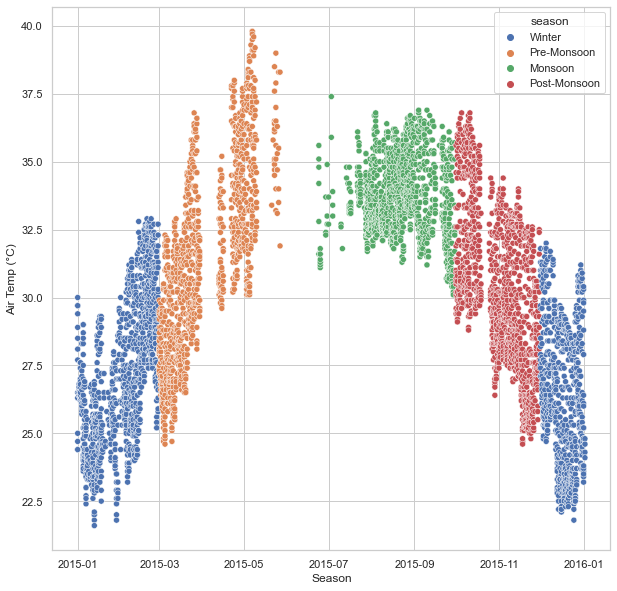

In [20]:
# Let us find the mean values and std of the various parameters in different seasons

# First make different dataframes for different seasons

plt.figure(figsize=(10,10))
sns.scatterplot(data = data, x='date_ist', y='Tc', hue='season')
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Season', fontsize=12)

In [21]:
# Make smaller dataframes from the dataset 

# we have premon, mon, postmon, and wint for different seasons and we have wint 2015 and 2016 for the two different years

# Run below only once
#data = data.drop(['time_gmt','date_gmt'], axis=1) 

splits = list(data.groupby("year"))
data2015 = pd.DataFrame(splits[0][1])

splits1 = list(data2015.groupby("season"))

premon = pd.DataFrame(splits1[2][1])
mon = pd.DataFrame(splits1[0][1])
postmon = pd.DataFrame(splits1[1][1])
wint = pd.DataFrame(splits1[3][1])

wint.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,humidity,rainfall,Tdc,Es,E,RH,Tv,theta,thetaE,season
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456273,24.836975,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.0,0.0,-30.551952,31.047343,0.478495,1.541179,24.757334,25.141584,180.851260,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456237,24.832451,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.0,0.0,-30.366297,31.606989,0.487062,1.540993,25.058339,25.436910,183.063595,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.0,0.0,-29.562611,34.135031,0.525757,1.540228,26.363135,26.745850,192.659390,Winter


### Air temperature seasonal variation

Text(0.5, 0, 'Month')

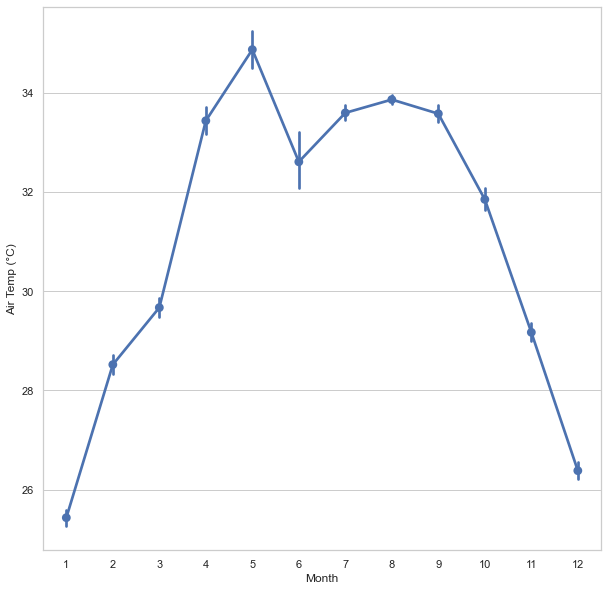

In [22]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='Tc')
#plt.xticks(rotation= 10)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Month', fontsize=12)

Text(0.5, 0, 'Month')

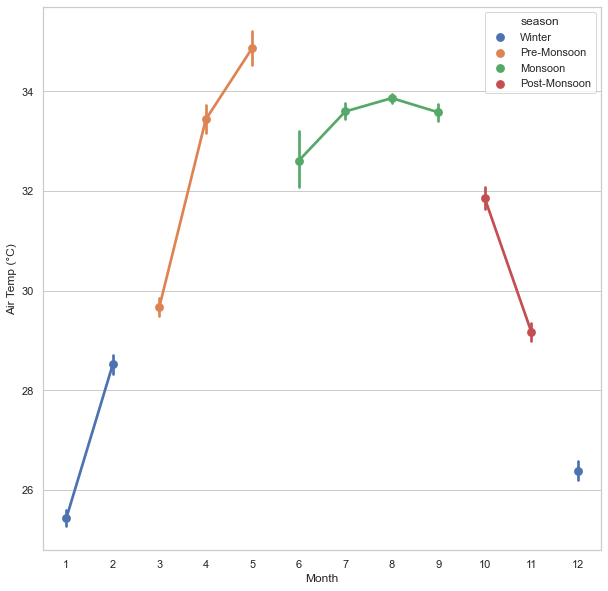

In [23]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Month', fontsize=12)

Text(0.5, 0, 'Weeks')

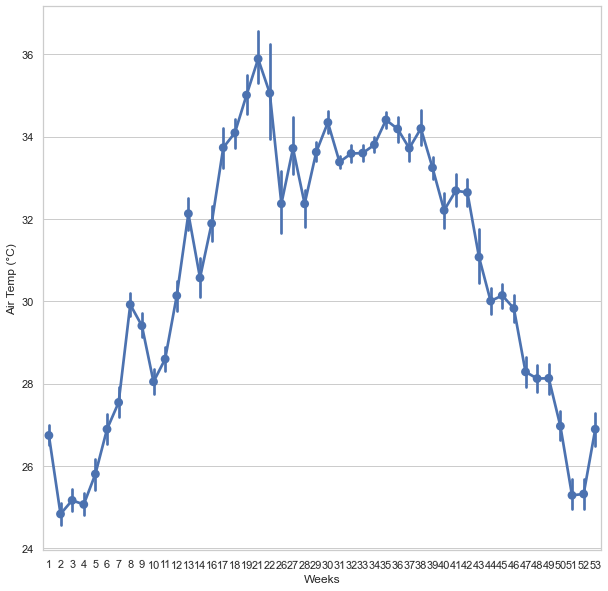

In [24]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='Tc')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

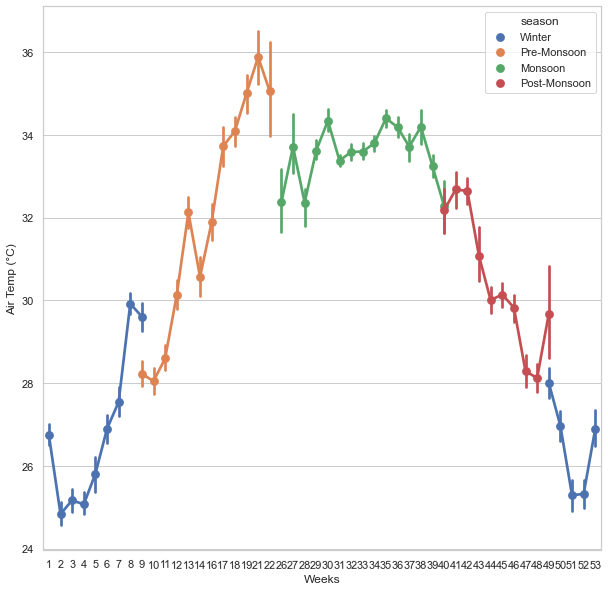

In [25]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='Tc', hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

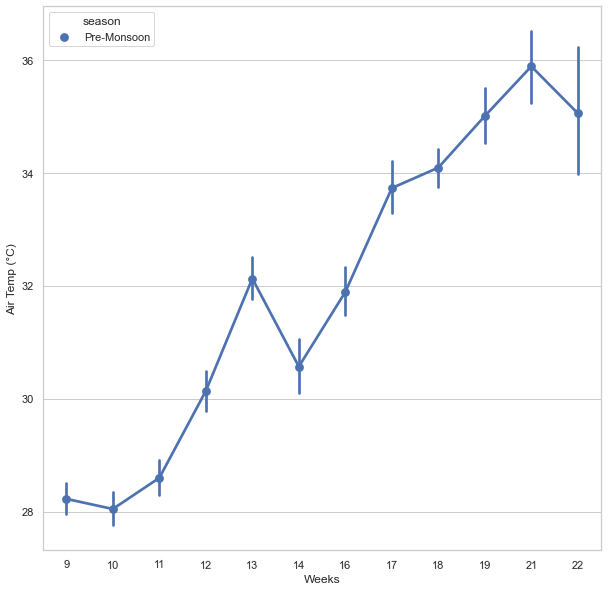

In [26]:
plt.figure(figsize=(10,10))
sns.pointplot(data = premon, x='Week_Number', y='Tc', hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

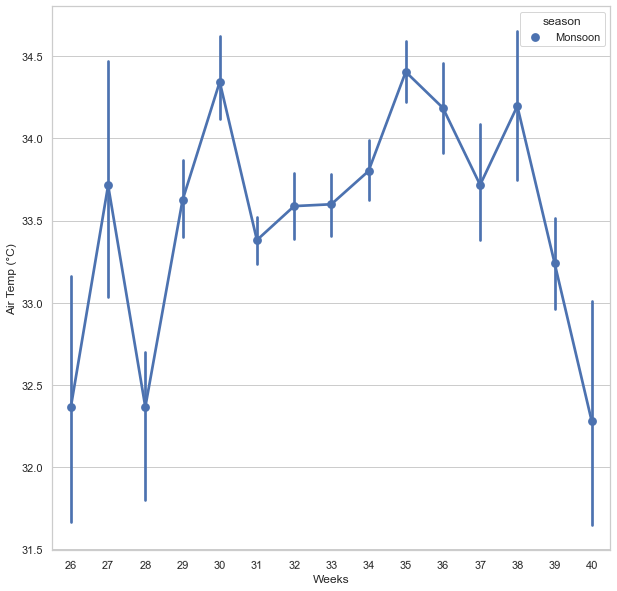

In [27]:
plt.figure(figsize=(10,10))
sns.pointplot(data = mon, x='Week_Number', y='Tc', hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

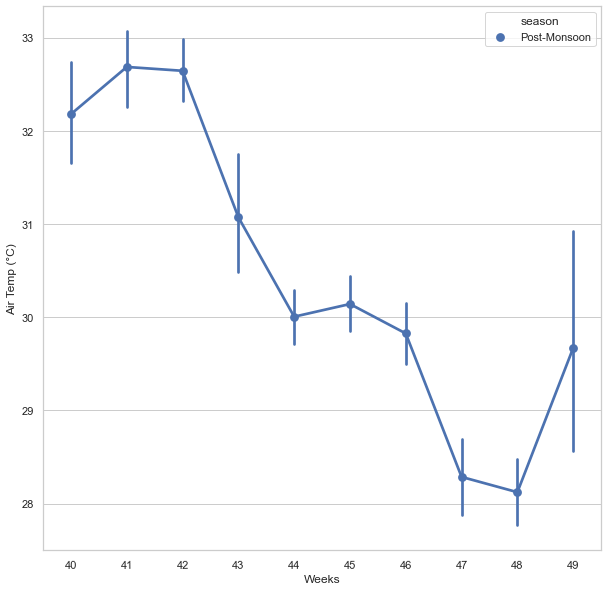

In [28]:
plt.figure(figsize=(10,10))
sns.pointplot(data = postmon, x='Week_Number', y='Tc', hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

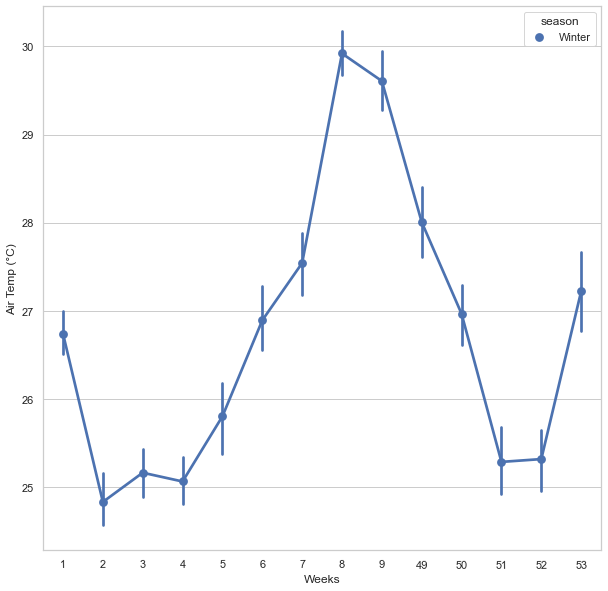

In [29]:
plt.figure(figsize=(10,10))
sns.pointplot(data = wint, x='Week_Number', y='Tc', hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

### Wind Speed Seasonal variation

In [30]:
data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,humidity,rainfall,Tdc,Es,E,RH,Tv,theta,thetaE,season
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456273,24.836975,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.0,0.0,-30.551952,31.047343,0.478495,1.541179,24.757334,25.141584,180.851260,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.0,0.0,-30.737677,30.496360,0.470061,1.541369,24.456237,24.832451,178.639683,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.0,0.0,-30.366297,31.606989,0.487062,1.540993,25.058339,25.436910,183.063595,Winter
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.0,0.0,-29.562611,34.135031,0.525757,1.540228,26.363135,26.745850,192.659390,Winter


Text(0.5, 0, 'Weeks')

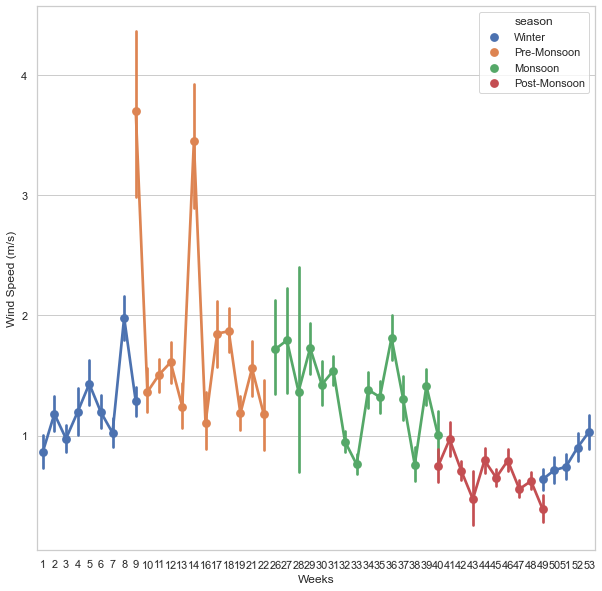

In [31]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='wind_speed', hue='season',style='season')
plt.xticks(rotation= 1)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

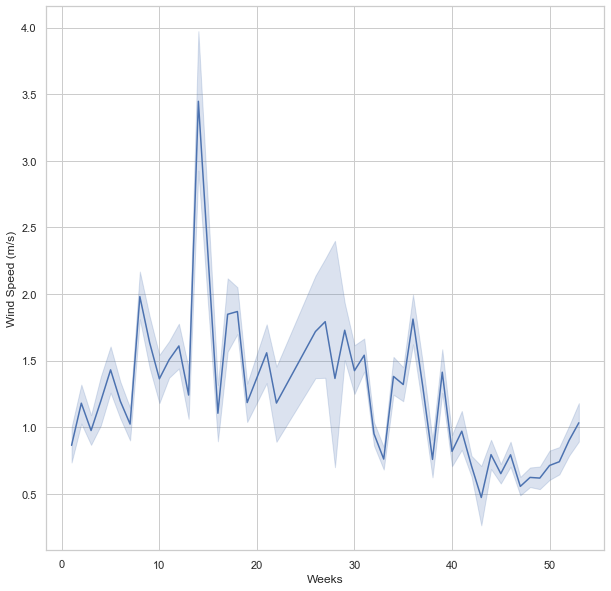

In [32]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data, x='Week_Number', y='wind_speed')
plt.xticks(rotation= 1)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Months')

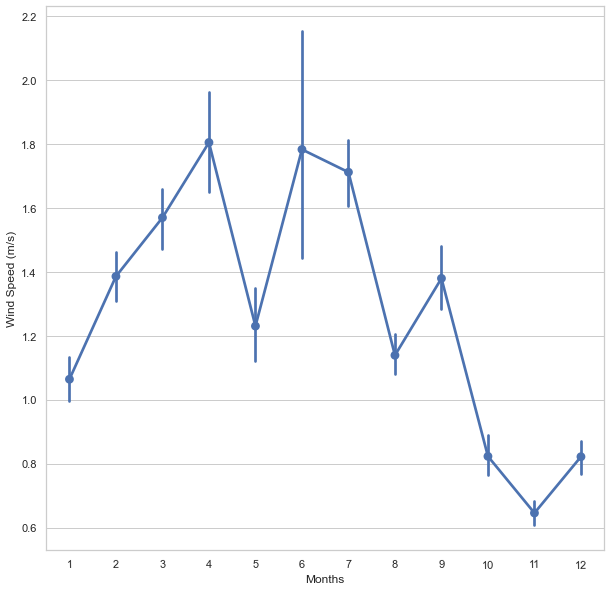

In [33]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='wind_speed')
plt.xticks(rotation= 1)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.xlabel('Months', fontsize=12)

### Wind direction seasonal variation

In [34]:
# Before doing seasonal variation of wind direction we need to break the wind speed into the 
# zonal and meridional components of u and v and then find angle from that and plot.

# The given wind direction is the vector direction and not meteorological direction so we will get 
# zonal and meridional in m/s as -

data['zonal_wind'] = data['wind_speed'] * (np.sin((np.pi/180)*data['wind_dir']))
data['meridional_wind'] = data['wind_speed'] * (np.cos((np.pi/180)*data['wind_dir']))

data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,Tdc,Es,E,RH,Tv,theta,thetaE,season,zonal_wind,meridional_wind
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,-30.737677,30.496360,0.470061,1.541369,24.456273,24.836975,178.639683,Winter,-0.243168,0.436886
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,-30.551952,31.047343,0.478495,1.541179,24.757334,25.141584,180.851260,Winter,-0.220119,0.203832
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,-30.737677,30.496360,0.470061,1.541369,24.456237,24.832451,178.639683,Winter,-0.031632,0.197483
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,-30.366297,31.606989,0.487062,1.540993,25.058339,25.436910,183.063595,Winter,-0.298046,0.633379
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,-29.562611,34.135031,0.525757,1.540228,26.363135,26.745850,192.659390,Winter,-0.309054,0.628081


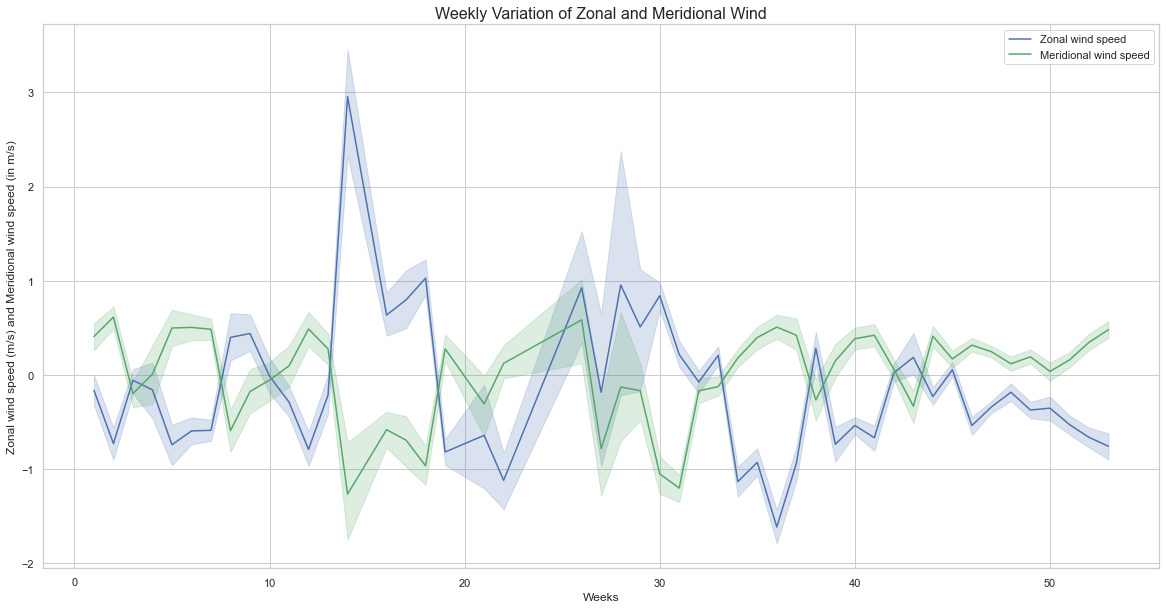

In [35]:
# This is the weekly variation of zonal and meridional wind

plt.figure(figsize=(20,10))
sns.lineplot(data = data, x='Week_Number', y='zonal_wind', markers="o", label='Zonal wind speed')
sns.lineplot(data = data, x='Week_Number', y='meridional_wind', color='g', markers="x", label='Meridional wind speed')
plt.xticks(rotation= 1)
plt.ylabel('Zonal wind speed (m/s) and Meridional wind speed (in m/s)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)
plt.title('Weekly Variation of Zonal and Meridional Wind', fontsize=16)
plt.savefig('zonal-meridional_weekly.png')

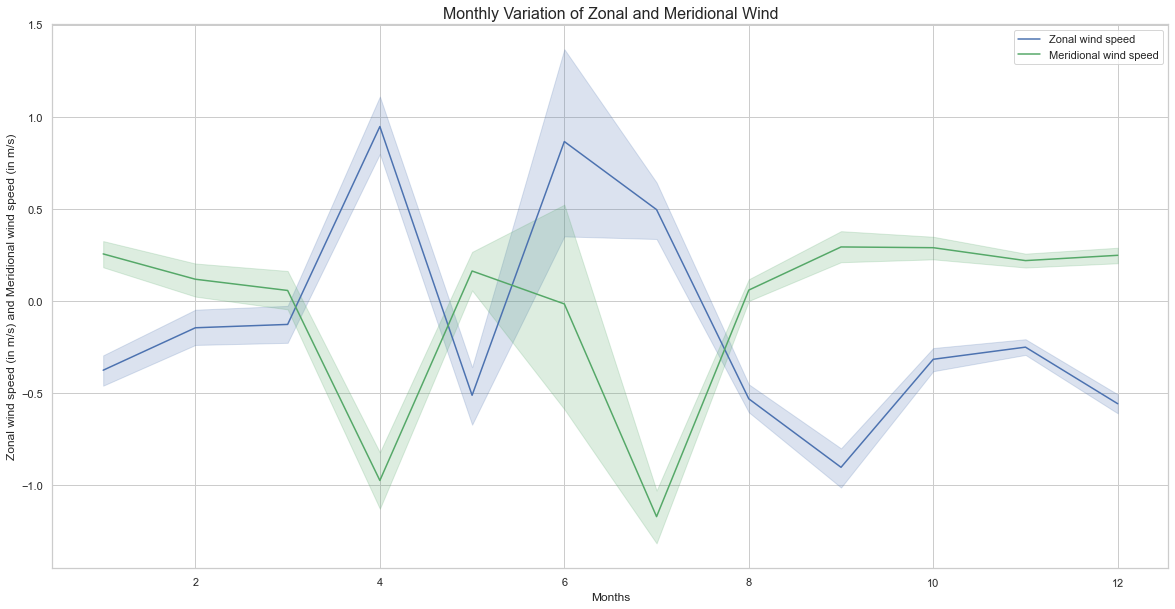

In [36]:
# This is the monthly variation of zonal and meridional wind

plt.figure(figsize=(20,10))
sns.lineplot(data = data, x='month', y='zonal_wind', markers="o", label='Zonal wind speed')
sns.lineplot(data = data, x='month', y='meridional_wind', color='g', markers="x", label='Meridional wind speed')
plt.xticks(rotation= 1)
plt.ylabel('Zonal wind speed (in m/s) and Meridional wind speed (in m/s)', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('Monthly Variation of Zonal and Meridional Wind', fontsize=16)
plt.savefig('zonal-meridional_monthly.png')

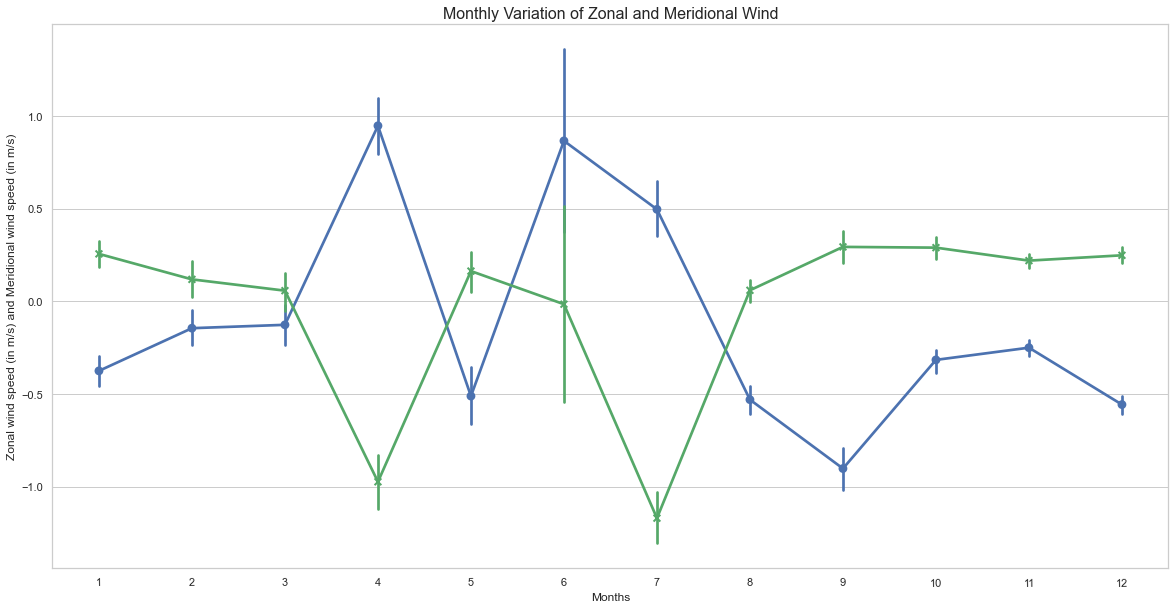

In [37]:
plt.figure(figsize=(20,10))
sns.pointplot(data = data, x='month', y='zonal_wind', markers="o",linestyle='-', label='Zonal wind speed')
sns.pointplot(data = data, x='month', y='meridional_wind', color='g', markers="x",linestyle='--', label='Meridional wind speed')
plt.xticks(rotation= 1)
plt.ylabel('Zonal wind speed (in m/s) and Meridional wind speed (in m/s)', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('Monthly Variation of Zonal and Meridional Wind', fontsize=16)
plt.savefig('zonal-meridional_monthly2.png')

### WIND ROSE diagram

In [38]:
# Another way of depicting wind direction is by using a Wind Rose

# Let us first make a column for strength and direction of the wind

strength = []

for wind_speed in data.wind_speed:
    if wind_speed >= 0.0 and wind_speed < 1.0:
        strength.append("0-1")
    elif wind_speed >= 1.0 and wind_speed < 2.0:
        strength.append("1-2")
    elif wind_speed >= 2.0 and wind_speed < 3.0:
        strength.append("2-3")
    elif wind_speed >= 3.0 and wind_speed < 4.0:
        strength.append("3-4")
    elif wind_speed >= 4.0 and wind_speed < 5.0:
        strength.append("4-5")
    elif wind_speed >= 5.0 and wind_speed < 6.0:
        strength.append("5-6")
    else:
        strength.append("6+")
        
direction = []

for wind_dir in data.wind_dir:
    if wind_dir >= 0.0 and wind_dir < 11.25:
        direction.append("N")
    elif wind_dir >= 11.25 and wind_dir < 33.75:
        direction.append("NNE")
    elif wind_dir >= 33.75 and wind_dir < 56.25:
        direction.append("NE")
    elif wind_dir >= 56.25 and wind_dir < 78.75:
        direction.append("ENE")
    elif wind_dir >= 78.75 and wind_dir < 101.25:
        direction.append("E")
    elif wind_dir >= 101.25 and wind_dir < 123.75:
        direction.append("ESE")
    elif wind_dir >= 123.75 and wind_dir < 146.25:
        direction.append("SE")
    elif wind_dir >= 146.25 and wind_dir < 168.75:
        direction.append("SSE")
    elif wind_dir >= 168.75 and wind_dir < 191.25:
        direction.append("S")
    elif wind_dir >= 191.25 and wind_dir < 213.75:
        direction.append("SSW")
    elif wind_dir >= 213.75 and wind_dir < 236.25:
        direction.append("SW")
    elif wind_dir >= 236.25 and wind_dir < 258.75:
        direction.append("WSW")
    elif wind_dir >= 258.75 and wind_dir < 281.25:
        direction.append("W")
    elif wind_dir >= 281.25 and wind_dir < 303.75:
        direction.append("WNW")
    elif wind_dir >= 303.75 and wind_dir < 326.25:
        direction.append("NW")
    elif wind_dir >= 326.25 and wind_dir < 348.75:
        direction.append("NNW")
    else:
        direction.append("N")
        
data['wind_strength'] = strength
data['direction'] = direction

data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,E,RH,Tv,theta,thetaE,season,zonal_wind,meridional_wind,wind_strength,direction
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.470061,1.541369,24.456273,24.836975,178.639683,Winter,-0.243168,0.436886,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.478495,1.541179,24.757334,25.141584,180.851260,Winter,-0.220119,0.203832,0-1,NW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.470061,1.541369,24.456237,24.832451,178.639683,Winter,-0.031632,0.197483,0-1,N
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.487062,1.540993,25.058339,25.436910,183.063595,Winter,-0.298046,0.633379,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.525757,1.540228,26.363135,26.745850,192.659390,Winter,-0.309054,0.628081,0-1,NNW


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


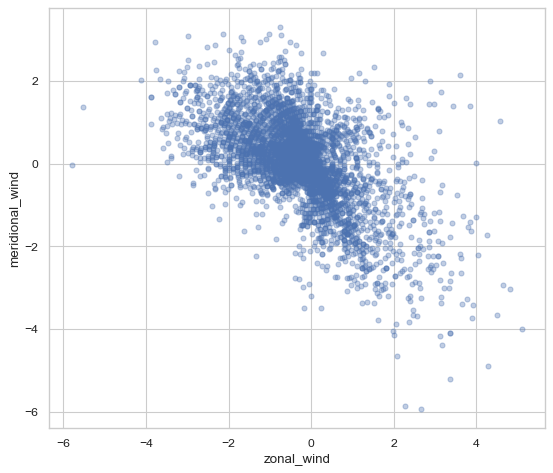

In [39]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = data.plot(kind='scatter', x='zonal_wind', y='meridional_wind', alpha=0.35, ax=ax)

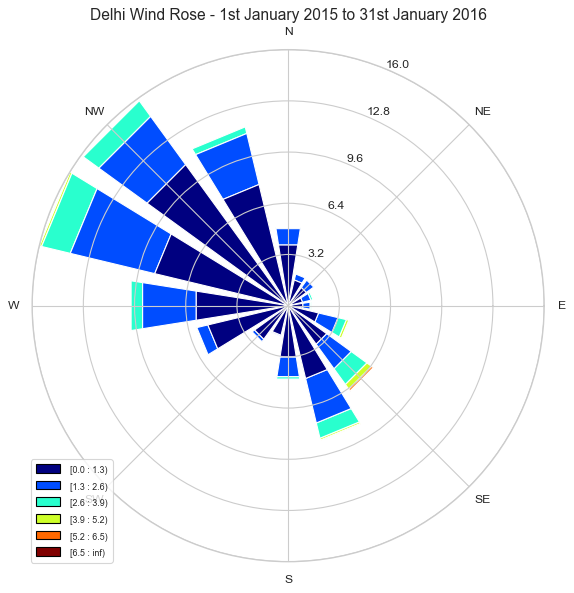

In [50]:
# Here is a wind rose chart using Plotly express

# fig = px.bar_polar(data_percent, r="percent", theta="direction", color="wind_strength",template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)
# fig1 = px.line_polar(data, r="percent", theta="direction", color="wind_strength", line_close=True,
#             color_discrete_sequence=px.colors.sequential.Plasma_r)
# fig.show()
# fig1.show()

# Here is the wind rose chart using the WindRose library

ax = WindroseAxes.from_ax()
ax.bar(data.wind_dir, data.wind_speed, normed=True, opening=0.8, edgecolor='white')
coordinates = ('E','NE','N','NW','W','SW','S','SE')
ax.set_xticklabels(coordinates)
ax.set_legend()
ax.set_title('Delhi Wind Rose - '\
             
            '1st January 2015 to 31st January 2016', fontsize=14)
plt.savefig('windrose_main.png')

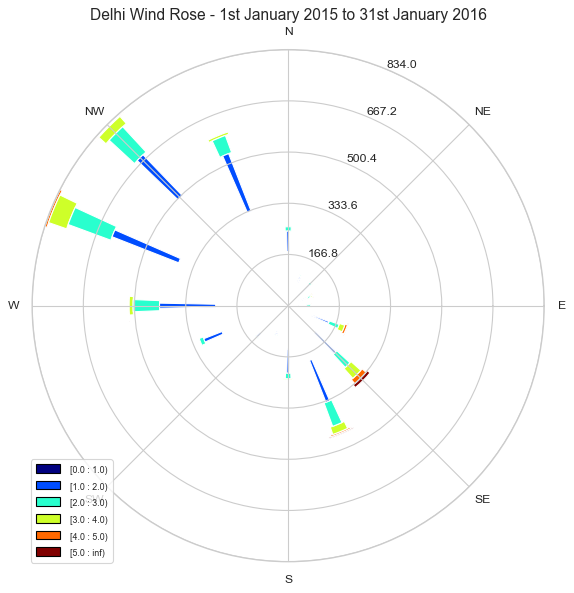

In [75]:
# Alternative

ax = WindroseAxes.from_ax()
ax.box(data.wind_dir, data.wind_speed, bins=np.arange(0, 6, 1))
coordinates = ('E','NE','N','NW','W','SW','S','SE')
ax.set_xticklabels(coordinates)
ax.set_title('Delhi Wind Rose - '\
             
            '1st January 2015 to 31st January 2016', fontsize=14)
ax.set_legend()
plt.savefig('windrose_main2.png')

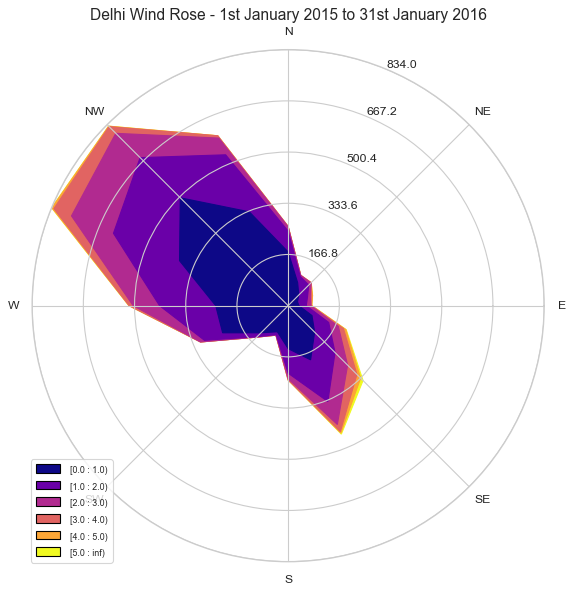

In [51]:
# Alternatively

ax = WindroseAxes.from_ax()
ax.contourf(data.wind_dir, data.wind_speed, bins=np.arange(0, 6, 1), cmap=cm.plasma)
#ax.contour(wd, ws, bins=np.arange(0, 6, 1), colors='black')
coordinates = ('E','NE','N','NW','W','SW','S','SE')
ax.set_xticklabels(coordinates)
ax.set_legend()
ax.set_title('Delhi Wind Rose - '\
             
            '1st January 2015 to 31st January 2016', fontsize=14)
plt.savefig('windrose_contourf.png')

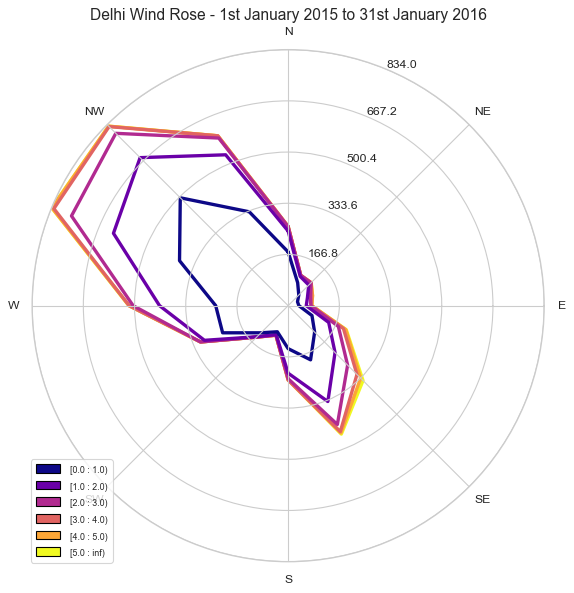

In [52]:
# Alternativle in Contour non-filled form

ax = WindroseAxes.from_ax()
ax.contour(data.wind_dir, data.wind_speed, bins=np.arange(0, 6, 1), cmap=cm.plasma, lw=3)
coordinates = ('E','NE','N','NW','W','SW','S','SE')
ax.set_xticklabels(coordinates)
ax.set_legend()
ax.set_title('Delhi Wind Rose - '\
             
            '1st January 2015 to 31st January 2016', fontsize=14)
plt.savefig('windrose_contour.png')

In [57]:
# frequency of each wind direction, for all wind speeds, do

ax.bar(data.wind_dir, data.wind_speed, normed=True, nsector=16)
table = ax._info['table']
wd_freq = np.sum(table, axis=0)

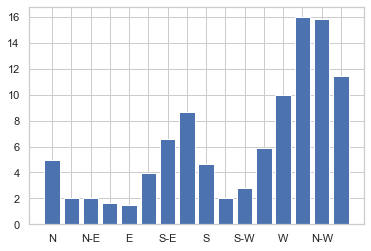

<Figure size 432x288 with 0 Axes>

In [58]:
direction = ax._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xlabels)
plt.show()
plt.savefig('frequency.png')

### Atmos Pressure Seasonal Variation

Text(0.5, 0, 'Months')

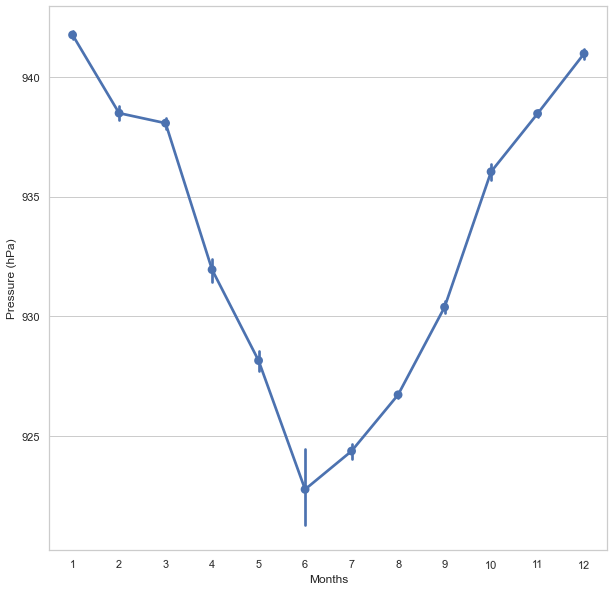

In [59]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='atmo_press')
plt.xticks(rotation= 1)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Months', fontsize=12)

Text(0.5, 0, 'Week')

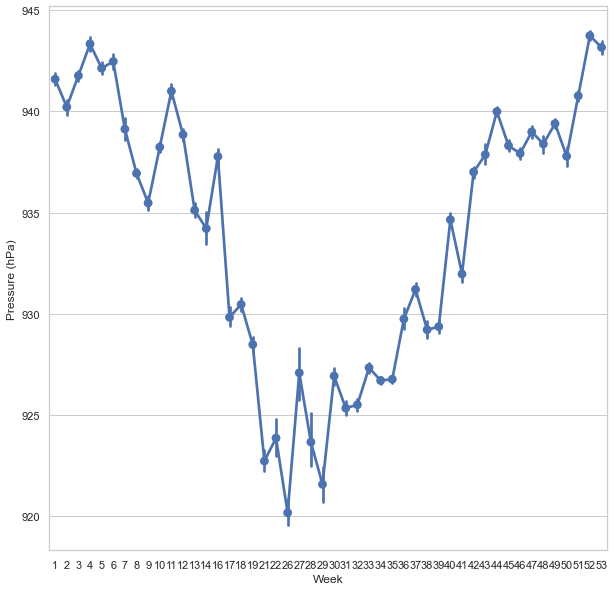

In [60]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='atmo_press')
plt.xticks(rotation= 1)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Week', fontsize=12)

Text(0.5, 0, 'Weeks')

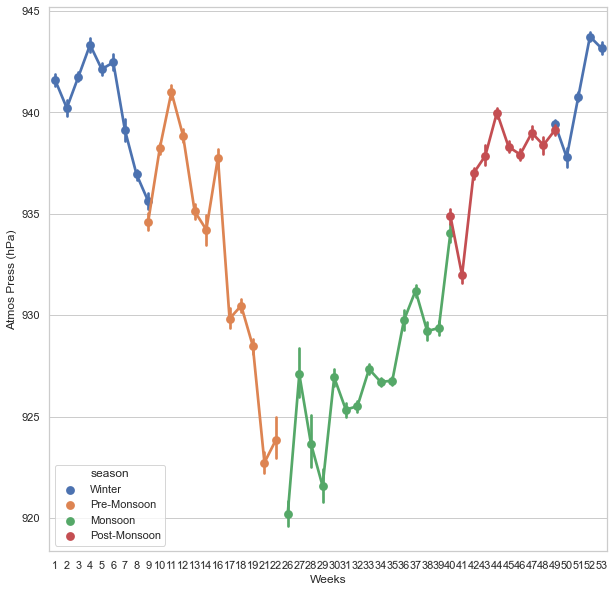

In [61]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='atmo_press', hue='season', style='season')
plt.xticks(rotation= 1)
plt.ylabel('Atmos Press (hPa)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

### Humidity Seasonal variation

Text(0.5, 0, 'Months')

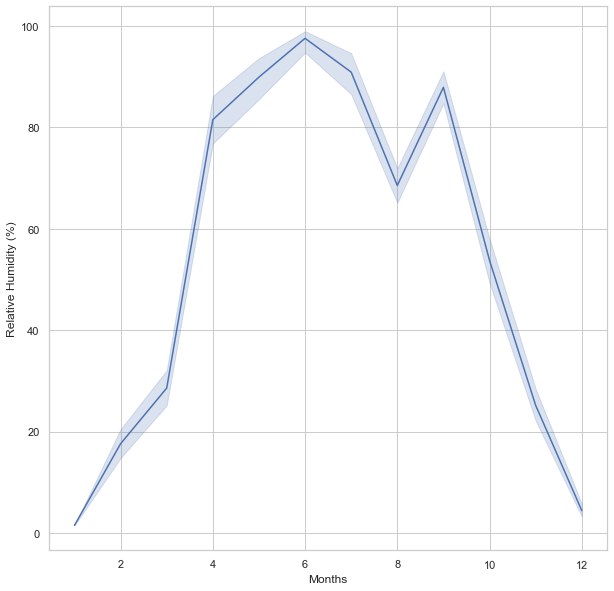

In [62]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data, x='month', y='RH')
plt.xticks(rotation= 1)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.xlabel('Months', fontsize=12)

Text(0.5, 0, 'Week')

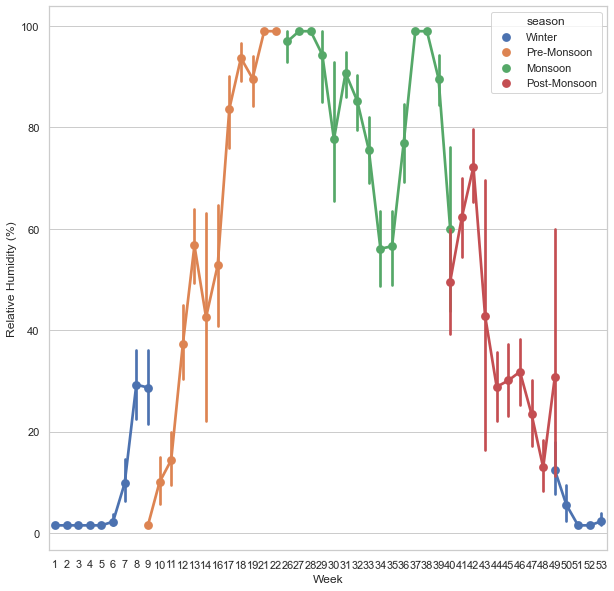

In [63]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='RH', hue='season', style='season')
plt.xticks(rotation= 1)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.xlabel('Week', fontsize=12)

### Rainfall Seasonal variation

Text(0.5, 0, 'Months')

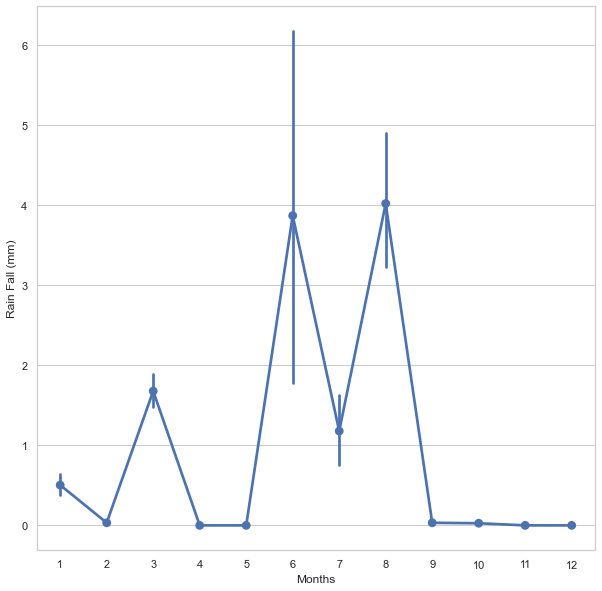

In [64]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='rainfall')
plt.xticks(rotation= 1)
plt.ylabel('Rain Fall (mm)', fontsize=12)
plt.xlabel('Months', fontsize=12)

Text(0.5, 0, 'Weeks')

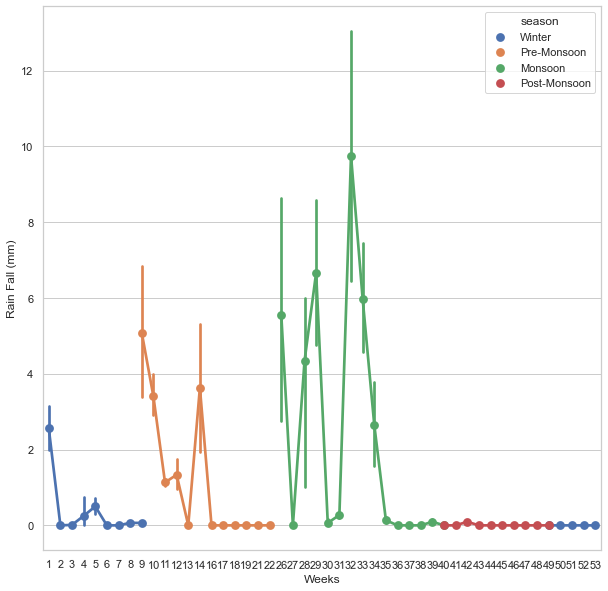

In [65]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='rainfall', hue='season', style='season')
plt.xticks(rotation= 1)
plt.ylabel('Rain Fall (mm)', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

In [66]:
data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,E,RH,Tv,theta,thetaE,season,zonal_wind,meridional_wind,wind_strength,direction
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.470061,1.541369,24.456273,24.836975,178.639683,Winter,-0.243168,0.436886,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.478495,1.541179,24.757334,25.141584,180.851260,Winter,-0.220119,0.203832,0-1,NW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.470061,1.541369,24.456237,24.832451,178.639683,Winter,-0.031632,0.197483,0-1,N
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.487062,1.540993,25.058339,25.436910,183.063595,Winter,-0.298046,0.633379,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.525757,1.540228,26.363135,26.745850,192.659390,Winter,-0.309054,0.628081,0-1,NNW


### Dew Point Temp Seasonal variation

Text(0.5, 0, 'Weeks')

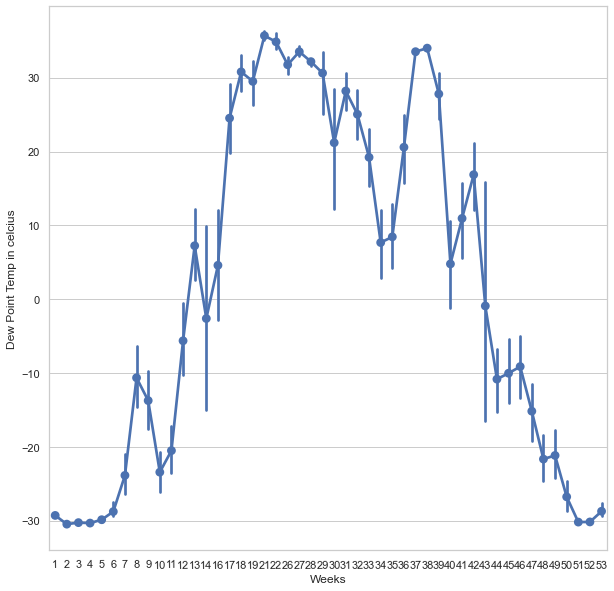

In [67]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='Tdc')
plt.xticks(rotation= 1)
plt.ylabel('Dew Point Temp in celcius', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

Text(0.5, 0, 'Weeks')

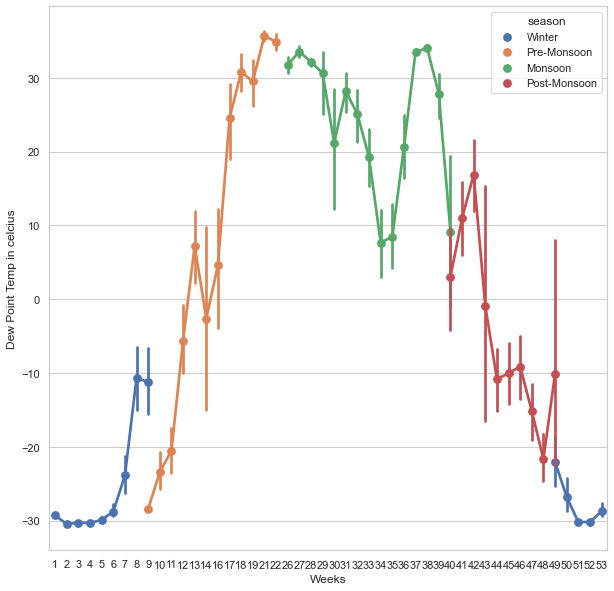

In [68]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='Week_Number', y='Tdc', hue='season', style='season')
plt.xticks(rotation= 1)
plt.ylabel('Dew Point Temp in celcius', fontsize=12)
plt.xlabel('Weeks', fontsize=12)

### Dew point temp and Temp comparison

Text(0.5, 0, 'Months')

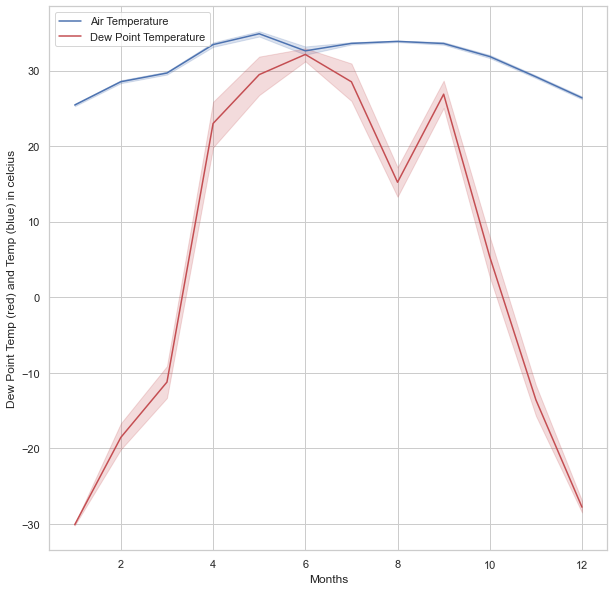

In [69]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data, x='month', y='Tc', markers="o", label='Air Temperature')
sns.lineplot(data = data, x='month', y='Tdc',color='r', markers="x", label='Dew Point Temperature')
plt.xticks(rotation= 1)
plt.ylabel('Dew Point Temp (red) and Temp (blue) in celcius', fontsize=12)
plt.xlabel('Months', fontsize=12)


# fig, ax = plt.subplots(figsize=(10,10))
# sns.pointplot(x='month', y='Tc', data=data, ax=ax, markers="o", linestyles="-")
# ax2 = ax.twinx()
# sns.pointplot(x='month', y='Tdc', data=data, ax=ax2, color='r', markers="x", linestyles="--")
# plt.show()

In [70]:
data.head()

,latitude,longitude,time_ist,date_ist,year,month,day,Week_Number,Tc,wind_speed,...,E,RH,Tv,theta,thetaE,season,zonal_wind,meridional_wind,wind_strength,direction
@STATION_ID,,,,,,,,,,,,,,,,,,,,,
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,5:30,2015-01-01,2015,1,1,1,24.4,0.5,...,0.470061,1.541369,24.456273,24.836975,178.639683,Winter,-0.243168,0.436886,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,6:30,2015-01-01,2015,1,1,1,24.7,0.3,...,0.478495,1.541179,24.757334,25.141584,180.851260,Winter,-0.220119,0.203832,0-1,NW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,7:30,2015-01-01,2015,1,1,1,24.4,0.2,...,0.470061,1.541369,24.456237,24.832451,178.639683,Winter,-0.031632,0.197483,0-1,N
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,8:30,2015-01-01,2015,1,1,1,25.0,0.7,...,0.487062,1.540993,25.058339,25.436910,183.063595,Winter,-0.298046,0.633379,0-1,NNW
IMDE1662_14167E(AKSHARDHAM),28.61,77.27,9:30,2015-01-01,2015,1,1,1,26.3,0.7,...,0.525757,1.540228,26.363135,26.745850,192.659390,Winter,-0.309054,0.628081,0-1,NNW


### Potential Temp seasonal variation

Text(0.5, 0, 'Months')

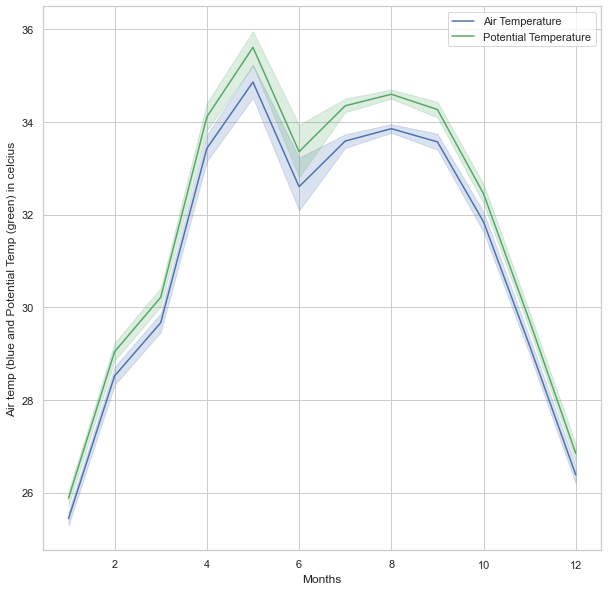

In [71]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data, x='month', y='Tc', markers="o", label='Air Temperature')
sns.lineplot(data = data, x='month', y='theta',color='g', markers="x", label='Potential Temperature')
plt.xticks(rotation= 1)
plt.ylabel('Air temp (blue and Potential Temp (green) in celcius', fontsize=12)
plt.xlabel('Months', fontsize=12)

# fig, ax = plt.subplots(sharex = True, figsize=(10,10))
# sns.pointplot(x='month', y='Tc', data=data, ax=ax, markers="o", linestyles="-")
# ax2 = ax.twinx()
# sns.pointplot(x='month', y='theta', data=data, ax=ax2, color='r', markers="x", linestyles="--")
# plt.show()

Text(0.5, 0, 'Months')

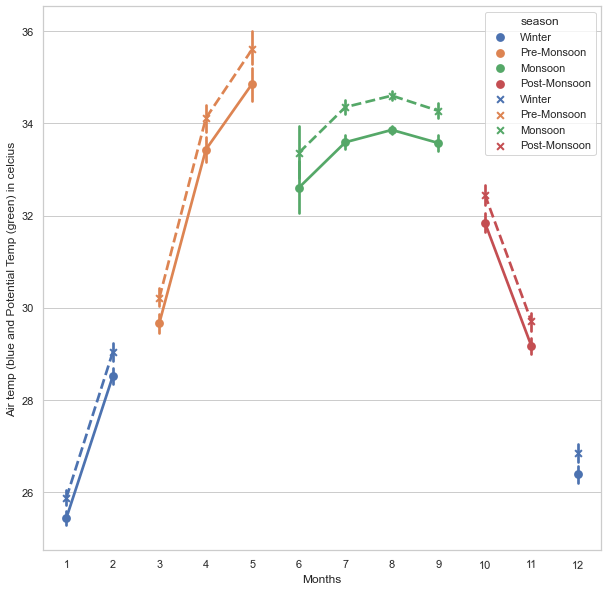

In [72]:
plt.figure(figsize=(10,10))
sns.pointplot(data = data, x='month', y='Tc', markers="o", linestyles="-", hue='season')
sns.pointplot(data = data, x='month', y='theta', markers="x", linestyles="--", hue='season')
plt.xticks(rotation= 1)
plt.ylabel('Air temp (blue and Potential Temp (green) in celcius', fontsize=12)
plt.xlabel('Months', fontsize=12)